<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Experimental-Metadata" data-toc-modified-id="Experimental-Metadata-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental Metadata</a></span></li><li><span><a href="#Expression-data" data-toc-modified-id="Expression-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Expression data</a></span><ul class="toc-item"><li><span><a href="#Replicate-Correlations" data-toc-modified-id="Replicate-Correlations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Replicate Correlations</a></span></li><li><span><a href="#Centering-to-reference-condition" data-toc-modified-id="Centering-to-reference-condition-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Centering to reference condition</a></span></li></ul></li><li><span><a href="#Exploring-I-modulons" data-toc-modified-id="Exploring-I-modulons-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring I-modulons</a></span><ul class="toc-item"><li><span><a href="#Important-dataframes" data-toc-modified-id="Important-dataframes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Important dataframes</a></span></li><li><span><a href="#Explained-variance" data-toc-modified-id="Explained-variance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Explained variance</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Get-I-modulon-information" data-toc-modified-id="Get-I-modulon-information-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Get I-modulon information</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import itertools
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
DATA_DIR = join('..','data')

# Load data

In [3]:
trn = pd.read_csv(join(DATA_DIR,'TRN.csv'),index_col=0)
gene_info = pd.read_csv(join(DATA_DIR,'gene_info.csv'),index_col=0)

log_tpm = pd.read_csv(join(DATA_DIR,'log_tpm.csv'),index_col=0)
metadata = pd.read_csv(join(DATA_DIR,'metadata.csv'),index_col=0)

S = pd.read_csv(join(DATA_DIR,'S.csv'),index_col=0)
A = pd.read_csv(join(DATA_DIR,'A.csv'),index_col=0)

imodulons = pd.read_csv(join(DATA_DIR,'curated_enrichments.csv'),index_col=0)

# Experimental Metadata

The metadata file contains comprehensive information on experimental conditions

In [4]:
metadata.head()

,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,0.00,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,0.00,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,1.06,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


In [5]:
# List of experiment attributes
metadata.columns

Index(['Study', 'Project ID', 'Condition ID', 'Replicate #',
       'Strain Description', 'Strain', 'Base Media', 'Carbon Source (g/L)',
       'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture',
       'Supplement', 'Temperature (C)', 'pH', 'Antibiotic', 'Culture Type',
       'Growth Rate (1/hr)', 'Evolved Sample', 'Isolate Type',
       'Sequencing Machine', 'Additional Details', 'Biological Replicates',
       'Alignment', 'DOI', 'GEO'],
      dtype='object')

In [6]:
# Accessing specific attributes
metadata[metadata['Carbon Source (g/L)'] == 'pyruvate(3.3)']

,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,,,
omics__bw_pyr__1,Omics,omics,bw_pyr,1,Escherichia coli BW25113,BW25113,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.37,No,NaN,MiSeq,NaN,2,97.36,doi.org/10.1038/ncomms13091,GSE59759
omics__bw_pyr__2,Omics,omics,bw_pyr,2,Escherichia coli BW25113,BW25113,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.37,No,NaN,MiSeq,NaN,2,97.59,doi.org/10.1038/ncomms13091,GSE59759
ica__ura_pyr__1,ICA,ica,ura_pyr,1,Escherichia coli K-12 MG1655,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.27,No,NaN,HiSeq 4000,NaN,2,93.77,NaN,GSE122295
ica__ura_pyr__2,ICA,ica,ura_pyr,2,Escherichia coli K-12 MG1655,MG1655,M9,pyruvate(3.3),NH4Cl(1),O2,...,Batch,0.27,No,NaN,HiSeq 4000,NaN,2,93.96,NaN,GSE122295


# Expression data

In [7]:
# log_tpm.csv contains the log-normalized expression data
# This file excludes noisy genes. For full expression profiles, see log_tpm_full.csv
print(log_tpm.shape)
log_tpm.head()

(3923, 278)


,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


## Replicate Correlations

The values in log_tpm are centered to a control condition before performing ICA. Here, we assess the correlations between replicates and non-replicates in both the centered dataset and the un-centered dataset.

In [8]:
rep_corrs = []
other_corrs = []
for r1,r2 in itertools.combinations(metadata.index,2):
    if r1[:-3] == r2[:-3]:
        rep_corrs.append(stats.pearsonr(log_tpm[r1],log_tpm[r2])[0])
    else:
        other_corrs.append(stats.pearsonr(log_tpm[r1],log_tpm[r2])[0])

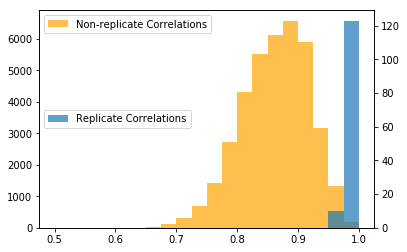

In [9]:
fig,ax = plt.subplots()
ax2 = plt.twinx(ax)
ax2.hist(rep_corrs,range=(0.5,1),bins=20,
         alpha=0.7,label='Replicate Correlations')
ax.hist(other_corrs,color='orange',range=(0.5,1),
        alpha=0.7,bins=20,label='Non-replicate Correlations')
ax.legend()
ax2.legend(loc=6)

## Centering to reference condition

**Data must be centered to a reference condition before performing ICA.**

In [10]:
log_tpm_centered = log_tpm.sub(log_tpm[['control__wt_glc__1','control__wt_glc__2']].mean(axis=1),axis=0)

In [11]:
rep_corrs_centered = []
other_corrs_centered = []
for r1,r2 in itertools.combinations(metadata.index,2):
    if r1[:-3] == r2[:-3]:
        rep_corrs_centered.append(stats.pearsonr(log_tpm_centered[r1],
                                        log_tpm_centered[r2])[0])
    else:
        other_corrs_centered.append(stats.pearsonr(log_tpm_centered[r1],
                                                   log_tpm_centered[r2])[0])

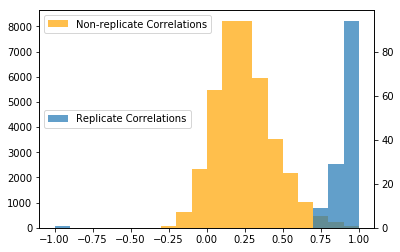

In [12]:
fig,ax = plt.subplots()
ax2 = plt.twinx(ax)
ax2.hist(rep_corrs_centered,range=(-1,1),bins=20,
         alpha=0.7,label='Replicate Correlations')
ax.hist(other_corrs_centered,color='orange',range=(-1,1),
        alpha=0.7,bins=20,label='Non-replicate Correlations')
ax.legend()
ax2.legend(loc=6)

# The control condition has pearson correlation of -1 due to centering.

# Exploring I-modulons

## Important dataframes

In [13]:
imodulons.head()

,regulator,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Category,threshold
name,,,,,,,,,,
AllR/AraC/FucR,allR/araC/fucR,0.750000,1.190000e-41,1.000000,0.600000,18.0,18,3,Carbon Source Utilization,0.086996
ArcA-1,arcA,0.130952,6.420000e-20,0.660000,0.072687,33.0,50,1,Energy Metabolism,0.058051
ArcA-2,arcA,0.087683,1.150000e-16,0.840000,0.046256,21.0,25,1,Energy Metabolism,0.081113
ArgR,argR,0.177778,6.030000e-18,0.923077,0.098361,12.0,13,1,Amino Acid and Nucleotide Biosynthesis,0.080441
AtoC,atoC,0.800000,1.520000e-12,0.666667,1.000000,4.0,6,1,Miscellaneous Metabolism,0.105756


In [14]:
# View gene information
gene_info.head()

,start,stop,strand,gene_name,length,operon,cog
b0001,189,255,+,thrL,66,thrLABC,No COG Annotation
b0002,336,2799,+,thrA,2463,thrLABC,Amino acid transport and metabolism
b0003,2800,3733,+,thrB,933,thrLABC,Amino acid transport and metabolism
b0004,3733,5020,+,thrC,1287,thrLABC,Amino acid transport and metabolism
b0005,5233,5530,+,yaaX,297,yaaX,Function unknown


In [15]:
# View TRN
trn.head()

,regulator,gene_id,effect
0,FMN,b3041,-
1,L-tryptophan,b3708,+
2,L-tryptophan,b3709,+
3,TPP,b0066,-
4,TPP,b0067,-


In [16]:
# View gene coefficients
S['EvgA'].head()

b0002   -0.009321
b0003    0.013218
b0004    0.005286
b0005   -0.007263
b0006   -0.003441
Name: EvgA, dtype: float64

In [17]:
# View i-modulon activities
A.loc['EvgA'].head()

control__wt_glc__1   -0.577041
control__wt_glc__2    0.577041
fur__wt_dpd__1        2.815495
fur__wt_dpd__2        2.777381
fur__wt_fe__1         2.155937
Name: EvgA, dtype: float64

## Explained variance

Explained variance is approximated by the $R^2$ Coefficient of Determination

In [18]:
err_var = ((log_tpm_centered - S @ A)**2).sum().sum()
orig_var = (log_tpm_centered**2).sum().sum()
print('Explained variance: {:.2f}'.format(1-err_var/orig_var))

Explained variance: 0.68


## Helper functions

In [19]:
def get_imodulon(name,show_info=True,show_regs=True):
    """
    Returns pandas dataframe containing i-modulon genes and coefficients.
    
    Parameters:
        name: I-modulon name
        show_info: Show extended information about each gene
        show_regs: Show known regulators for each gene (separated by commas)
    """
    
    if name not in imodulons.index:
        raise ValueError('{} is not a valid i-modulon name. See imodulons.index'.format(name))
    
    comp = S[name]
    thresh = imodulons.loc[name,'threshold']
    genes = comp[abs(comp) > thresh].sort_values(ascending=False)
    
    if not show_info:
        df = pd.DataFrame(genes)
    
    else:
        df = gene_info.loc[genes.index]
        df['coefficient'] = genes.values
    
    if show_regs:
        for gene in genes.index:
            df.loc[gene,'regulators'] = ','.join(trn[trn.gene_id==gene].regulator.tolist())
    return df

In [20]:
def get_regulon(regulator):
    """
    Parses regulators (for / and + operators) and returns the genes in the regulon.
    
    "/" indicates an OR relation (i.e. union of regulons)
    "+" indicates an AND relation (i.e. intersection of regulons)
    
    Parameters:
        regulator: Name of regulator (see imodulons.regulator)
    """
    
    if '/' in regulator:
        regs = regulator.split('/')
        genes = set()
        for reg in regs:
            genes = genes.union(trn[trn.regulator == reg].gene_id.tolist())
        return sorted(genes)
        
    elif '+' in regulator:
        regs = regulator.split('+')
        genes = set()
        for reg in regs:
            genes = genes.intersection(trn[trn.regulator == reg].gene_id.tolist())
        return sorted(genes)
    else:
        return trn[trn.regulator == regulator].gene_id.tolist()

In [21]:
def compute_threshold(S,k,cutoff=550):
    """Computes kurtosis-based threshold for a component of an S matrix
        S: Component matrix with gene weights
        k: Component name
        cutoff: Minimum test statistic value to determine threshold (550 is default from sensitivity analysis)
    """
    i = 0 
    # Sort genes based on absolute value
    ordered_genes = abs(S[k]).sort_values()
    K,p = stats.normaltest(S.loc[:,k])
    while K > cutoff:
        i -= 1
        # Check if K statistic is below cutoff
        K,p = stats.normaltest(S.loc[ordered_genes.index[:i],k])
    comp_genes = ordered_genes.iloc[i:]
    if len(comp_genes) == len(S.index):
        return max(comp_genes)+.05
    else:
        return np.mean([ordered_genes.iloc[i],ordered_genes.iloc[i-1]])

## Get I-modulon information

get_imodulon: Returns pandas dataframe containing i-modulon genes and coefficients.

In [22]:
compute_threshold(S,'EvgA')

0.06665543853924999

In [23]:
get_imodulon('EvgA')

,start,stop,strand,gene_name,length,operon,cog,coefficient,regulators
b2375,2493766,2494402,-,yfdX,636,yfdX-frc-oxc-yfdVE,Function unknown,0.311186,"evgA,rpoD"
b2374,2492003,2493254,-,frc,1251,yfdX-frc-oxc-yfdVE,Energy production and conversion,0.281062,"evgA,rpoD"
b1597,1671375,1671684,+,asr,309,asr,No COG Annotation,0.277402,"gadX,h-NS,phoB,rcdA,rpoD,rpoS,rstA"
b2373,2490255,2491950,-,oxc,1695,yfdX-frc-oxc-yfdVE,Amino acid transport and metabolism,0.251294,"evgA,rpoD"
b2372,2489241,2490186,-,yfdV,945,yfdX-frc-oxc-yfdVE,Function unknown,0.246215,"evgA,rpoD,yeiE"
b1499,1582925,1583687,-,ydeO,762,safA-ydeO,Transcription,0.243267,"evgA,h-NS,phoP,rcsB,rpoD,rpoH,ydeO"
b2085,2167988,2168306,-,yegR,318,yegRZ,Function unknown,0.210130,"evgA,nac,rpoD"
b1501,1584206,1586486,-,ydeP,2280,ydeP,Energy production and conversion,0.178046,"evgA,h-NS,nac,nagC,narL,narP,phoP,rcsB,rpoD,uvrY"
b2376,2494697,2494973,+,ypdI,276,ypdI,No COG Annotation,0.176086,
b2371,2488022,2489168,-,yfdE,1146,yfdX-frc-oxc-yfdVE,Energy production and conversion,0.175203,"evgA,rpoD"


get_regulon: Parses regulators (for / and + operators) and returns the genes in the regulon.

"/" indicates an OR relation (i.e. union of regulons)  
"+" indicates an AND relation (i.e. intersection of regulons)

In [24]:
print(get_regulon('allR/araC/fucR'))

['b0061', 'b0062', 'b0063', 'b0064', 'b0396', 'b0504', 'b0505', 'b0507', 'b0508', 'b0509', 'b0511', 'b0512', 'b0513', 'b0514', 'b1497', 'b1498', 'b1900', 'b1901', 'b2799', 'b2800', 'b2801', 'b2802', 'b2803', 'b2804', 'b2805', 'b2840', 'b2841', 'b3564', 'b3565', 'b4460']
